### Feature Creation: MathematicalCombination
The MathematicalCombination() applies basic mathematical operations **[‘sum’, ‘prod’, ‘mean’, ‘std’, ‘max’, ‘min’]** to multiple features, returning one or more additional features as a result.

For this demonstration, we use the UCI Wine Quality Dataset.

The data is publicly available on **[UCI repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler

from feature_engine.creation import MathFeatures
from feature_engine.imputation import MeanMedianImputer

pd.set_option('display.max_columns', None)

In [2]:
# Read data
data = pd.read_csv('../data/winequality-red.csv', sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**This Data contains 11 features, all numerical, with no missing values.**

In [3]:
# Let's transform the Target, i.e Wine Quality into a binary classification problem:

bins = [0,5,10]

labels = [0, 1] # 'low'=0, 'high'=1

data['quality_range']= pd.cut(x=data['quality'], bins=bins, labels=labels)

data[['quality_range','quality']].head(5)

,quality_range,quality
0,0,5
1,0,5
2,0,5
3,1,6
4,0,5


In [4]:
# drop original target

data.drop('quality', axis=1, inplace = True) 

### Sum and Mean Combinators:
Let's create two new variables:
- avg_acidity = mean(fixed acidity, volatile acidity)
- total_minerals = sum(Total sulfure dioxide, sulphates)


In [5]:
# Create the Combinators

math_combinator_mean = MathFeatures(
    variables=['fixed acidity', 'volatile acidity'],
    func = ['mean'],
    new_variables_names = ['avg_acidity']
)

math_combinator_sum = MathFeatures(
    variables=['total sulfur dioxide', 'sulphates'],
    func = ['sum'],
    new_variables_names = ['total_minerals']
)

# Fit the Mean Combinator on training data
math_combinator_mean.fit(data)

# Transform the data
data_t = math_combinator_mean.transform(data)

# We can combine both steps in a single call with ".fit_transform()" methode
data_t = math_combinator_sum.fit_transform(data_t)

In [6]:
data_t.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range,avg_acidity,total_minerals
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4.05,34.56
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,4.34,67.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,4.28,54.65
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,5.74,60.58
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4.05,34.56


You can check the mappings between each new variable and the operation it's created with in the **combination_dict_**

In [7]:
# math_combinator_mean.feature_names_in_

In [8]:
math_combinator_mean.variables_

['fixed acidity', 'volatile acidity']

### Combine with more than 1 operation

We can also combine the variables with more than 1 mathematical operation. And the transformer has the option to create variable names automatically.

In [9]:
# Create the Combinators

multiple_combinator = MathFeatures(
    variables=['fixed acidity', 'volatile acidity'],
    func = ['mean', 'sum'],
    new_variables_names = None
)


# Fit the Combinator to the training data
multiple_combinator.fit(data)

# Transform the data
data_t = multiple_combinator.transform(data)

In [10]:
# Note the 2 additional variables at the end of the dataframe
data_t.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range,mean_fixed acidity_volatile acidity,sum_fixed acidity_volatile acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4.05,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,4.34,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,4.28,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,5.74,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4.05,8.10


In [11]:
multiple_combinator._get_new_features_name()

['mean_fixed acidity_volatile acidity', 'sum_fixed acidity_volatile acidity']

In [12]:
# # and here the variable names and the operation that was
# # applied to create that variable

# multiple_combinator.combination_dict_

# # {'mean(fixed acidity-volatile acidity)': 'mean',
# #  'sum(fixed acidity-volatile acidity)': 'sum'}


### Pipeline Example

We can put all these transformations into single pipeline:

1. Create new variables
2. Scale features
3. Train a Logistic Regression model to predict wine quality

See more on how to use Feature-engine within Scikit-learn Pipelines in these **[examples](https://github.com/solegalli/feature_engine/tree/master/examples/Pipelines)**

In [13]:
X = data.drop(['quality_range'], axis=1)

y = data.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y
                                                    )
X_train.shape, X_test.shape

((1439, 11), (160, 11))

In [14]:
value_pipe = pipe([
    ('math_combinator_mean', MathFeatures(variables=['fixed acidity', 'volatile acidity'],
                                          func=['mean'],
                                          new_variables_names=['avg_acidity'])),
    ('math_combinator_sum', MathFeatures(variables=['total sulfur dioxide', 'sulphates'],
                                         func=['sum'],
                                         new_variables_names=['total_minerals'])),
    ('scaler', StandardScaler()),
    ('LogisticRegression', LogisticRegression())
])

In [15]:
value_pipe.fit(X_train, y_train)

Pipeline(steps=[('math_combinator_mean',
                 MathFeatures(func=['mean'],
                              new_variables_names=['avg_acidity'],
                              variables=['fixed acidity', 'volatile acidity'])),
                ('math_combinator_sum',
                 MathFeatures(func=['sum'],
                              new_variables_names=['total_minerals'],
                              variables=['total sulfur dioxide', 'sulphates'])),
                ('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [16]:
pred_train = value_pipe.predict(X_train)
pred_test = value_pipe.predict(X_test)

In [17]:
print('Logistic Regression Model train accuracy score: {}'.format(
    accuracy_score(y_train, pred_train)))
print()
print('Logistic Regression Model test accuracy score: {}'.format(
    accuracy_score(y_test, pred_test)))

Logistic Regression Model train accuracy score: 0.744266851980542

Logistic Regression Model test accuracy score: 0.75


In [18]:
print('Logistic Regression Model test classification report: \n\n {}'.format(
    classification_report(y_test, pred_test)))

Logistic Regression Model test classification report: 

               precision    recall  f1-score   support

           0       0.73      0.73      0.73        74
           1       0.77      0.77      0.77        86

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.75      0.75      0.75       160



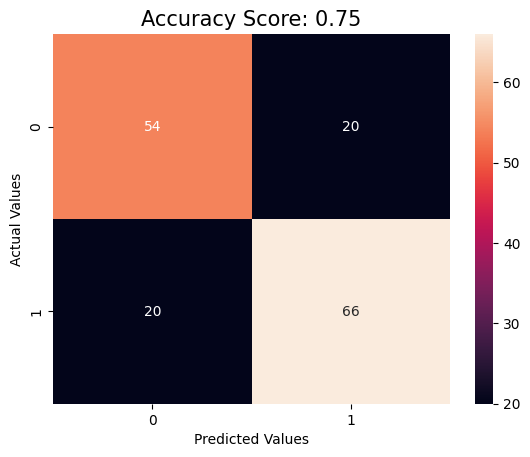

In [19]:
score = round(accuracy_score(y_test, pred_test), 3)
cm = confusion_matrix(y_test, pred_test)

sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

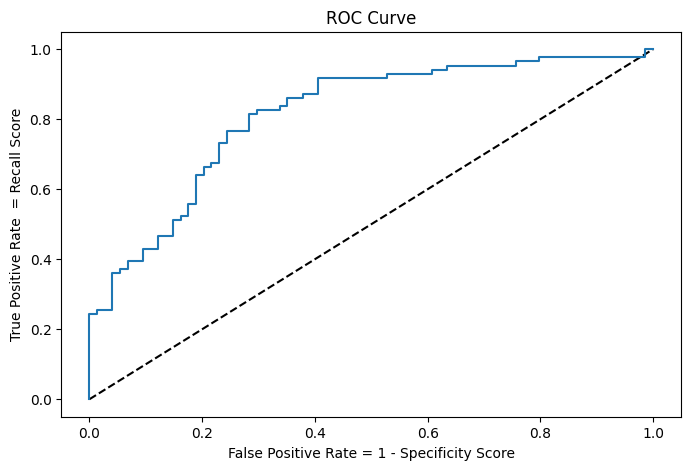

In [20]:
# Predict probabilities for the test data
probs = value_pipe.predict_proba(X_test)[:, 1]

# Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()